## Introduction to geopandas

[GeoPandas](https://geopandas.org/en/stable/docs/user_guide.html) is a library for working with spatial (typically geographic) data. It extends the functionality of pandas to support spatial data types and operations, making it easier to analyze, visualize, and manipulate spatial data.

Many of the tasks that are typically done within a GIS can be done via geopandas.

In this module, we will:
- [load spatial data](#load)
- [view data](#view)
- [make choropleths](#choro)

In [2]:
import geopandas as gpd
import pandas as pd
import contextily as cx

<a class="anchor" id="load"></a>
Let's load some spatial data into `GeoDataFrame`s, an extension of pandas `DataFrame`s for working with spatial data.

We're going to load census tract boundaries from a ShapeFile, tabular census data stored as a .csv, and major transit routes stored as points and lines.

The census boundary data is available from Statistics Canada (https://www12.statcan.gc.ca/census-recensement/2021/geo/sip-pis/boundary-limites/)

The transit data was filtered from Open Data from Metrolinx (https://www.metrolinx.com/en/about-us/open-data)

In [3]:
transit_stops = gpd.read_file("data/ttc_stops.geojson") #note the different functions you use to read spatial vs non-spatial data
transit_routes = gpd.read_file("data/ttc_routes.geojson")
census_tracts = gpd.read_file("data/toronto_census_tract_2021.shp")
census_data = pd.read_csv("data/census_tract_data_sample.csv")

Let's take a look at the first layer, the transit stops. We have two columns with text, and a third with geometry data. The three main types of geometries are `Point`, `LineString`, and `Polygon`

In [4]:
transit_stops

,LOCATION_N,NAME,geometry
0,Avenue,Eglinton Crosstown LRT,POINT (-79.40851 43.70460)
1,Forest Hill,Eglinton Crosstown LRT,POINT (-79.42556 43.70102)
2,Leaside,Eglinton Crosstown LRT,POINT (-79.37715 43.71105)
3,Sloane,Eglinton Crosstown LRT,POINT (-79.31352 43.72597)
4,Birchmount,Eglinton Crosstown LRT,POINT (-79.27791 43.73006)
...,...,...,...
101,Vaughan Metropolitan Centre,Toronto-York Spadina Subway Extension,POINT (-79.52727 43.79351)
102,Sheppard-Yonge,Sheppard Subway,POINT (-79.41092 43.76151)
103,Spadina,Bloor-Danforth Subway,POINT (-79.40397 43.66728)
104,St. George,Bloor-Danforth Subway,POINT (-79.39930 43.66827)


The data can be manipulated like a regular pandas data frame. For example, if we want to filter out all stations on the "Eglinton Crosstown LRT" line, since it hasn't been completed yet (at the time of writing), we can do so as follows:

In [5]:
transit_stops = transit_stops.loc[transit_stops["NAME"] != "Eglinton Crosstown LRT"]
transit_stops

,LOCATION_N,NAME,geometry
25,Kipling,Bloor-Danforth Subway,POINT (-79.53628 43.63694)
26,Islington,Bloor-Danforth Subway,POINT (-79.52459 43.64532)
27,Royal York,Bloor-Danforth Subway,POINT (-79.51129 43.64811)
28,Old Mill,Bloor-Danforth Subway,POINT (-79.49509 43.65007)
29,Jane,Bloor-Danforth Subway,POINT (-79.48446 43.64979)
...,...,...,...
101,Vaughan Metropolitan Centre,Toronto-York Spadina Subway Extension,POINT (-79.52727 43.79351)
102,Sheppard-Yonge,Sheppard Subway,POINT (-79.41092 43.76151)
103,Spadina,Bloor-Danforth Subway,POINT (-79.40397 43.66728)
104,St. George,Bloor-Danforth Subway,POINT (-79.39930 43.66827)


We can do the same for the transit lines data. Here the data are coded as a MULTILINESTRING, essentially a combination of lines that combine into one object. There are also MULTIPOLYGON geometry types

In [6]:
transit_routes = transit_routes.loc[transit_routes["NAME"] != "Eglinton Crosstown LRT"]
transit_routes

,STATUS,TECHNOLOGY,NAME,geometry
0,Existing,Subway,Sheppard Subway,"MULTILINESTRING ((-79.41092 43.76151, -79.4096..."
1,Existing,Subway,Yonge-University-Spadina Subway,"MULTILINESTRING ((-79.46247 43.75043, -79.4621..."
2,Existing,Subway,Spadina Subway Extension,"MULTILINESTRING ((-79.52727 43.79351, -79.5261..."
4,Existing,Subway,Scarborough RT,"MULTILINESTRING ((-79.26453 43.73226, -79.2632..."
5,Existing,Subway,Bloor Subway,"MULTILINESTRING ((-79.26453 43.73226, -79.2669..."


<a class="anchor" id="view"></a>
We explore geometry simply by plotting. We can do this for any row, or the entire GeoDataFrame. This is useful to explore your data right after loading it in, but not suitable to present or analyze data.

<Axes: >

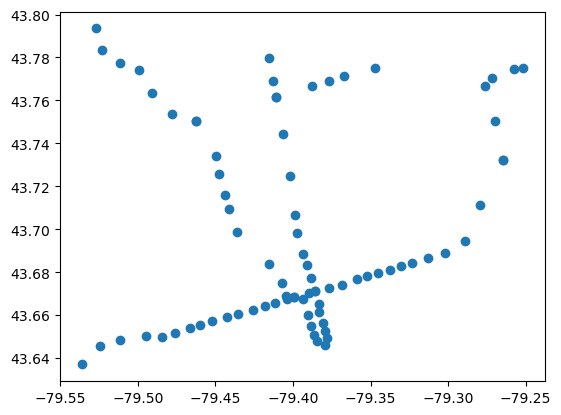

In [7]:
transit_stops.plot()

This is the default plot, but we can tweak the colours, add multiple layers, and change some of the layout options using [matplotlib](https://matplotlib.org/), probably the most commonly used map. Here's a very simple schematic of rapid transit in Toronto (circa 2021)

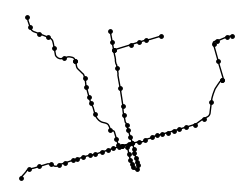

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 1, figsize=(3, 3))

transit_stops.plot(
    color="Black",
    markersize = 6,
    ax = ax
)

transit_routes.plot(
    linewidth = 1,
    color="Black",
    ax = ax
).set_axis_off()

Let's take a look at the census tract data. Here we have polygon geometries.

In [9]:
census_tracts

,id,ctuid,dguid,ctname,landarea,pruid,geometry
0,487,5350128.04,2021S05075350128.04,0128.04,0.1620,35,"POLYGON ((629437.750 4839364.950, 629247.561 4..."
1,502,5350363.06,2021S05075350363.06,0363.06,0.8210,35,"POLYGON ((640741.738 4848050.419, 640723.345 4..."
2,506,5350363.07,2021S05075350363.07,0363.07,2.2422,35,"POLYGON ((642782.718 4849973.938, 642781.180 4..."
3,508,5350378.23,2021S05075350378.23,0378.23,1.5314,35,"POLYGON ((639248.900 4849901.332, 639248.900 4..."
4,509,5350378.24,2021S05075350378.24,0378.24,2.5129,35,"POLYGON ((639952.255 4850407.204, 639952.255 4..."
...,...,...,...,...,...,...,...
580,5861,5350210.04,2021S05075350210.04,0210.04,0.4751,35,"MULTIPOLYGON (((623047.314 4831182.748, 623047..."
581,5862,5350062.03,2021S05075350062.03,0062.03,0.4638,35,"POLYGON ((629776.795 4835352.843, 629766.377 4..."
582,5863,5350062.04,2021S05075350062.04,0062.04,0.1215,35,"POLYGON ((630319.668 4835517.832, 630149.660 4..."
583,5864,5350017.01,2021S05075350017.01,0017.01,0.8026,35,"POLYGON ((633075.947 4834744.346, 633089.159 4..."


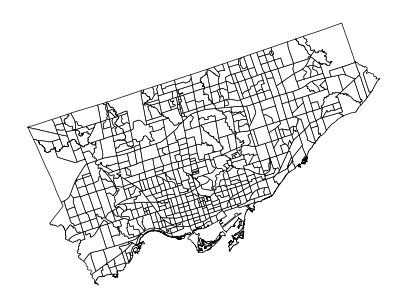

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))

census_tracts.plot(
    edgecolor="Black",
    color="White",
    linewidth=0.5,
    ax = ax
).set_axis_off()

Let's try to make a choropleth map. We'll have to join in the tabular data in `census_data`

In [11]:
census_data

,ctuid,avg_aftertax_hhld_income_2020,median_aftertax_hhld_income_2020,population_2021,low_income_percent_2020,households_2021,dwellings_2021
0,x,0.0,0.0,0.0,0.0,0.0,0.0
1,001,86300.0,72500.0,212579.0,11.3,90000.0,97429.0
2,0010001.00,69200.0,55200.0,1643.0,23.5,705.0,764.0
3,0010002.00,77500.0,60800.0,4451.0,16.0,2065.0,2271.0
4,0010003.01,72500.0,54800.0,4151.0,17.0,2060.0,2298.0
...,...,...,...,...,...,...,...
6293,9700100.00,85600.0,71000.0,1249.0,13.2,545.0,634.0
6294,9700101.00,97100.0,94000.0,4375.0,6.0,1725.0,1802.0
6295,9700102.00,116100.0,104000.0,3603.0,5.8,1355.0,1586.0
6296,9700103.01,NaN,NaN,84.0,NaN,35.0,36.0


In [12]:
census_tracts_data = census_tracts.merge(census_data, how='left', on='ctuid')
census_tracts_data.head()

,id,ctuid,dguid,ctname,landarea,pruid,geometry,avg_aftertax_hhld_income_2020,median_aftertax_hhld_income_2020,population_2021,low_income_percent_2020,households_2021,dwellings_2021
0,487,5350128.04,2021S05075350128.04,0128.04,0.1620,35,"POLYGON ((629437.750 4839364.950, 629247.561 4...",79700.0,69000.0,4772.0,16.4,2935.0,3145.0
1,502,5350363.06,2021S05075350363.06,0363.06,0.8210,35,"POLYGON ((640741.738 4848050.419, 640723.345 4...",70800.0,65000.0,7176.0,16.7,3265.0,3441.0
2,506,5350363.07,2021S05075350363.07,0363.07,2.2422,35,"POLYGON ((642782.718 4849973.938, 642781.180 4...",60150.0,52800.0,5164.0,25.4,1935.0,2011.0
3,508,5350378.23,2021S05075350378.23,0378.23,1.5314,35,"POLYGON ((639248.900 4849901.332, 639248.900 4...",91700.0,82000.0,3840.0,9.4,1285.0,1325.0
4,509,5350378.24,2021S05075350378.24,0378.24,2.5129,35,"POLYGON ((639952.255 4850407.204, 639952.255 4...",75200.0,63200.0,5820.0,17.5,2130.0,2199.0


<a class="anchor" id="choro"></a>
Let's create a population density map. We can first comput a population density column, then map it! <br>

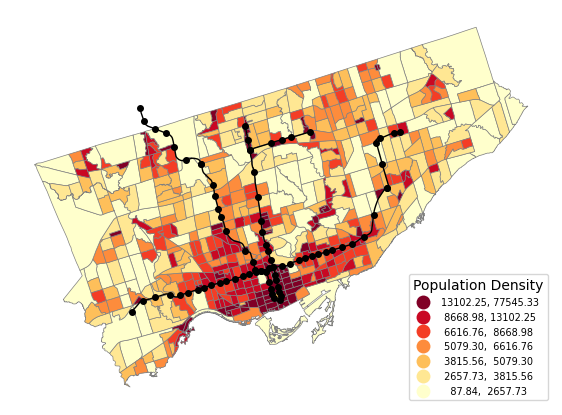

In [33]:
census_tracts_data["population density"] = census_tracts_data["population_2021"] / census_tracts_data["landarea"]

fig, ax = plt.subplots(figsize=(7, 7))

transit_routes.to_crs(4326).plot(
    linewidth = 1,
    color="Black",
    ax = ax,
    zorder=3 #layer order 
)

transit_stops.to_crs(4326).plot(
    color="Black",
    markersize = 16, #size of point
    ax = ax,
    zorder=2 #layer order
)

census_tracts_data.to_crs(4326).plot(
    column = "population density", #variable to map
    edgecolor="Gray", #edge of polygon
    cmap = 'YlOrRd', #color palette
    k = 7, #number of classes
    scheme = "Quantiles", #class scheme
    linewidth=0.5, #polygon line width
    legend = True, #show the legend
    zorder=1, #layer order
    legend_kwds = {
        "loc": "lower right", #legend location in figure
        "fontsize": 7, #legend font size
        "title": "Population Density", #legend title
        "alignment": "left", #legend font alignment
        "reverse": True #show highest to lowest
    },
    ax=ax
).set_axis_off()

# fig.savefig('test.png')

Just by switching up the variable, we can make a map of average income.

We will also make a few more cartographic changes, including switching the `cmap` parameter, which is short for [colour-ramp](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

_Note: We will add a basemap from CartoDB. Other basemaps under this provider include:_
- Positron
- PositronNoLabels 
- PositronOnlyLabels 
- DarkMatter 
- DarkMatterNoLabels 
- DarkMatterOnlyLabels 
- Voyager 
- VoyagerNoLabels
- VoyagerOnlyLabels
- VoyagerLabelsUnder

Text(0, 0.1, 'Data Sources: Statistics Canada & Metrolinx')

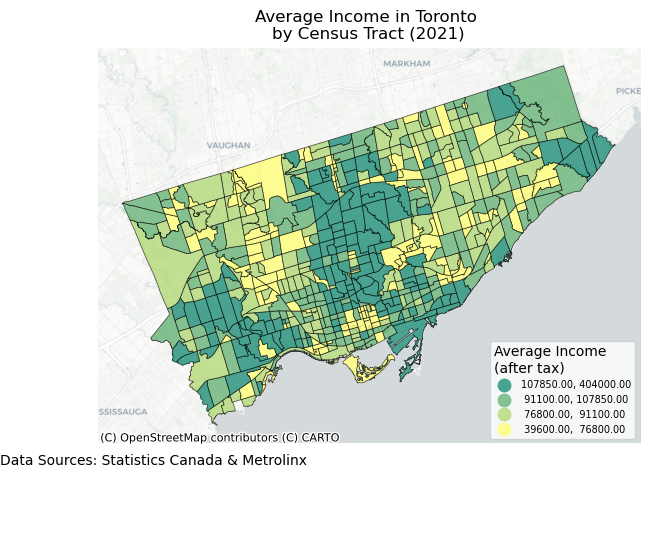

In [72]:
fig, ax = plt.subplots(figsize=(7, 7))

census_tracts_data.to_crs("EPSG:3857").plot( #must use web mercator crs to use a basemap
    column = "avg_aftertax_hhld_income_2020",
    edgecolor="Black",
    cmap = 'summer_r', #reverse color map order with _r
    k = 4,
    scheme = "Quantiles", 
    alpha=0.7, #transparency with 1 being completely transparent and 0 being completely opaque
    linewidth=0.5,
    legend = True,
    legend_kwds = {
        "loc": "lower right",
        "fontsize": 7,
        "title": "Average Income\n(after tax)",
        "alignment": "left",
        "reverse": True
    },
    ax=ax
).set_axis_off()

ax.set_title("Average Income in Toronto \nby Census Tract (2021)"); #map title
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron) #add basemap

ax.annotate("Data Sources: Statistics Canada & Metrolinx", xy = (0,0.1), xycoords = 'figure fraction') #add source text